# Transfer Learning ResNet152V2 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Importing the libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# Re-sizing all the Images 
IMAGE_SIZE = [224, 224]

train_path = 'D:\\College\\Cotton Disease\\train\\'
valid_path = 'D:\\College\\Cotton Disease\\test\\'


### Import the Vgg 16 library

In [3]:
# Here we will be using imagenet weights

resnet152v2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in resnet152v2.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('D:\\College\\Cotton Disease\\train\\*')

In [6]:
# Flatten the input
x = Flatten()(resnet152v2.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs = resnet152v2.input, outputs=prediction)

In [8]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [9]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\\College\\Cotton Disease\\train\\',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('D:\\College\\Cotton Disease\\test\\',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 106 images belonging to 4 classes.


In [13]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
training_set.classes

array([0, 0, 0, ..., 3, 3, 3])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)

In [17]:
# Fit the model
model.fit(training_set, validation_data=test_set, epochs=20, steps_per_epoch=len(training_set), validation_steps=len(test_set), batch_size = 32)

Epoch 1/20
61/61 [==============================] - 221s 4s/step - loss: 1.1199 - accuracy: 0.8391 - val_loss: 1.2796 - val_accuracy: 0.9245
Epoch 2/20
61/61 [==============================] - 218s 4s/step - loss: 0.5179 - accuracy: 0.9144 - val_loss: 0.5859 - val_accuracy: 0.9151
Epoch 3/20
61/61 [==============================] - 221s 4s/step - loss: 0.3517 - accuracy: 0.9518 - val_loss: 0.3643 - val_accuracy: 0.9151
Epoch 4/20
61/61 [==============================] - 218s 4s/step - loss: 0.3542 - accuracy: 0.9580 - val_loss: 0.4159 - val_accuracy: 0.9245
Epoch 5/20
61/61 [==============================] - 220s 4s/step - loss: 0.4920 - accuracy: 0.9446 - val_loss: 0.9823 - val_accuracy: 0.9245
Epoch 6/20
61/61 [==============================] - 218s 4s/step - loss: 0.3790 - accuracy: 0.9646 - val_loss: 0.2681 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 218s 4s/step - loss: 0.3075 - accuracy: 0.9636 - val_loss: 0.4426 - val_accuracy: 0.9340
Epoch 8/20
61

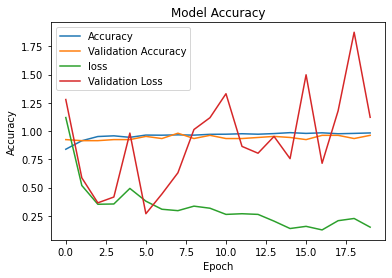

In [18]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [19]:
#Save the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet152v2.h5')

# **Testing**

### Example 1

1/1 [==============================] - 2s 2s/step


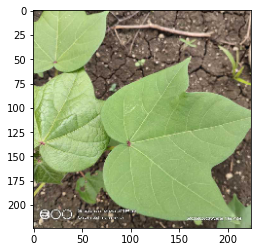

In [20]:
#Example 1

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:\\College\\Cotton Disease\\val\\fresh cotton leaf\\d (9)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [21]:
preds

array([[2.8123845e-34, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [22]:
preds = np.argmax(preds, axis=1)

In [23]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is fresh cotton leaf


### Example 2

1/1 [==============================] - 0s 157ms/step


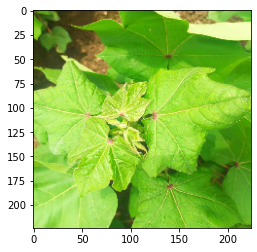

In [24]:
#Example 2

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:\\College\\Cotton Disease\\val\\diseased cotton plant\\dd (795)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [25]:
preds

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 5.519896e-37]],
      dtype=float32)

In [26]:
preds = np.argmax(preds, axis=1)

In [27]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant


In [28]:
test_predictions = model.predict(test_set)

4/4 [==============================] - 12s 2s/step


In [29]:
test_predictions

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.31221362e-33, 6.49165471e-38],
       [1.00000000e+00, 0.00000000e+00, 2.58815575e-25, 1.86729537e-33],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.16468202e-31, 2.54034525e-16, 0.00000000e+00],
       [1.00000000e+00, 4.59256638e-26, 7.98487217e-23, 1.93439017e-26],
       [1.00000000e+00, 8.94123843e-37, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 9.21025764e-15, 1.39976545e-13],
       [1.00000000e+00, 1.20234131e-34, 0.00000000e+00, 0.00000000e+00],
       [9.38977718e-01, 6.52272205e-15, 6.10222518e-02, 2.19090501e-12],
       [1.00000000e+00, 0.00000000e+00, 3.08467802e-27, 5.20633452e-29],
       [1.00000000e+00, 0.00000000e+00, 6.24196784e

In [30]:
test_labels = test_set.classes

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [32]:
confusion_matrix(test_labels, np.argmax(test_predictions, axis = 1))

array([[25,  0,  0,  0],
       [ 1, 27,  0,  0],
       [ 0,  0, 25,  1],
       [ 1,  1,  0, 25]], dtype=int64)

In [33]:
print(classification_report(test_labels, np.argmax(test_predictions, axis = 1)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.96      0.96      0.96        28
           2       1.00      0.96      0.98        26
           3       0.96      0.93      0.94        27

    accuracy                           0.96       106
   macro avg       0.96      0.96      0.96       106
weighted avg       0.96      0.96      0.96       106

